In [33]:

import numpy as np
import matplotlib.pyplot as plt

#                ->   [x1,x2]
individuo = np.array([[1,  2],       
                      [2,  3],      
                      [8,  7],      
                      [7,  8],
                              ])

# pesos    se pueden cambiar
w =np.array( [[3,  9], # pesos para x1
              [6,  8], # pesos para x2
                        ])
# Parámetro de aprendizaje
pa = 1

# Número de épocas
num_epocas = 4

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 5 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    
    for i in range(len(individuo)):
        print(f"\nProcesando individuo {i}: {individuo[i]}")
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            D = dx**2 + dy**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
        print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        
        # 3. Actualizar pesos: neurona ganadora y sus vecinas
        if indice_min == 0:
            print("Caso: neurona ganadora es la primera (índice 0)")
            # Actualizar neurona ganadora (0) y su vecina derecha (1)
            for k in [0, 1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        elif indice_min == longitud:
            print(f"Caso: neurona ganadora es la última (índice {longitud})")
            # Actualizar neurona ganadora (longitud) y su vecina izquierda (longitud-1)
            for k in [longitud, longitud-1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        else:
            print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
            # Actualizar neurona ganadora y sus dos vecinas (izquierda y derecha)
            for k in [indice_min-1, indice_min, indice_min+1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
        
        print("Pesos actualizados:")
        print(w)

print("\n--- Pesos finales ---")
print(w)



--- Época 1 ---

Procesando individuo 0: [1 2]
Distancias calculadas: [20, 100]
Neurona ganadora: índice 0, distancia 20.0000
Caso: neurona ganadora es la primera (índice 0)
Pesos actualizados:
[[1 1]
 [2 2]]

Procesando individuo 1: [2 3]
Distancias calculadas: [2, 2]
Neurona ganadora: índice 0, distancia 2.0000
Caso: neurona ganadora es la primera (índice 0)
Pesos actualizados:
[[2 2]
 [3 3]]

Procesando individuo 2: [8 7]
Distancias calculadas: [52, 52]
Neurona ganadora: índice 0, distancia 52.0000
Caso: neurona ganadora es la primera (índice 0)
Pesos actualizados:
[[8 8]
 [7 7]]

Procesando individuo 3: [7 8]
Distancias calculadas: [2, 2]
Neurona ganadora: índice 0, distancia 2.0000
Caso: neurona ganadora es la primera (índice 0)
Pesos actualizados:
[[7 7]
 [8 8]]

--- Época 2 ---

Procesando individuo 0: [1 2]
Distancias calculadas: [72, 72]
Neurona ganadora: índice 0, distancia 72.0000
Caso: neurona ganadora es la primera (índice 0)
Pesos actualizados:
[[1 1]
 [2 2]]

Procesando

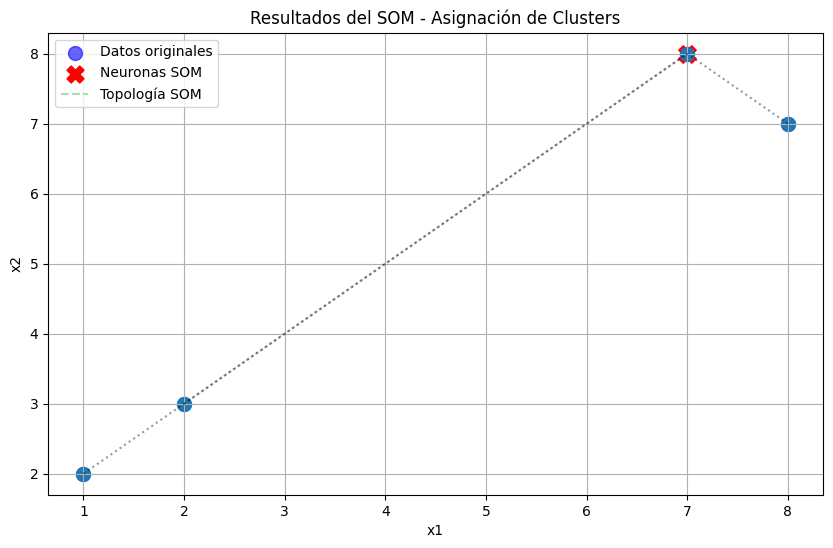

In [32]:
# Código adicional para visualización
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(individuo[:, 0], individuo[:, 1], c='blue', label='Datos originales', s=100, alpha=0.6)

# Graficar los pesos finales de las neuronas
plt.scatter(w[0, :], w[1, :], c='red', marker='X', label='Neuronas SOM', s=150)

# Conectar las neuronas para mostrar la topología
plt.plot(w[0, :], w[1, :], 'g--', alpha=0.3, label='Topología SOM')

# Asignar cada punto a su neurona ganadora y colorear
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(num_neuronas)]
    neurona_ganadora = np.argmin(distancias)
    plt.plot([individuo[i, 0], w[0, neurona_ganadora]], 
             [individuo[i, 1], w[1, neurona_ganadora]], 
             'k:', alpha=0.4)
    
    # Colorear según la neurona ganadora
    plt.scatter(individuo[i, 0], individuo[i, 1], c=f'C{neurona_ganadora}', s=100)

plt.title('Resultados del SOM - Asignación de Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

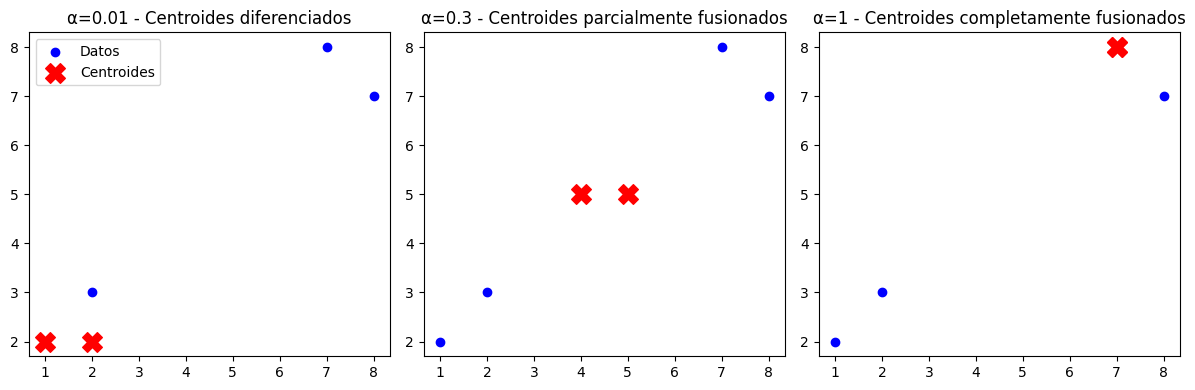

In [34]:
import matplotlib.pyplot as plt

# Datos
datos = np.array([[1,2], [2,3], [8,7], [7,8]])
centroides_bajo = np.array([[1,2], [2,2]])    # α=0.01
centroides_medio = np.array([[4,5], [5,5]])   # α=0.3
centroides_alto = np.array([[7,8], [7,8]])    # α=1

plt.figure(figsize=(12, 4))

# α=0.01
plt.subplot(131)
plt.scatter(datos[:,0], datos[:,1], c='blue', label='Datos')
plt.scatter(centroides_bajo[:,0], centroides_bajo[:,1], c='red', marker='X', s=200, label='Centroides')
plt.title('α=0.01 - Centroides diferenciados')
plt.legend()

# α=0.3
plt.subplot(132)
plt.scatter(datos[:,0], datos[:,1], c='blue')
plt.scatter(centroides_medio[:,0], centroides_medio[:,1], c='red', marker='X', s=200)
plt.title('α=0.3 - Centroides parcialmente fusionados')

# α=1
plt.subplot(133)
plt.scatter(datos[:,0], datos[:,1], c='blue')
plt.scatter(centroides_alto[:,0], centroides_alto[:,1], c='red', marker='X', s=200)
plt.title('α=1 - Centroides completamente fusionados')

plt.tight_layout()
plt.show()